In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [21]:
class Linear_Regression:
    def __init__(self, learning_rate, no_of_iteratiions):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iteratiions

    def fit(self, X, Y):
        self.m, self.n = X.shape # number of rows and coulmns in dataset

        # set the weight and bias values initally as 0
        self.w = np.zeros(self.n)
        self.b = 0

        self.X = X
        self.Y = Y

        
        self.compute_gradient_descent()

        return self

    def compute_gradient(self):

       
        dj_dw = 0
        dj_db = 0

        for i in range(self.m):
            f_wb = np.dot(self.w, self.X[i]) + self.b

            dj_dw_i = (f_wb - self.Y[i]) * self.X[i]
            dj_db_i = (f_wb - self.Y[i])

            dj_dw += dj_dw_i
            dj_db += dj_db_i

        dj_dw /= self.m
        dj_db /= self.m

        return dj_dw, dj_db
    
    def compute_gradient_descent(self):
         for i in range(self.no_of_iterations):
            dj_dw, dj_db = self.compute_gradient()

            # Update weights and bias
            self.w -= self.learning_rate * dj_dw
            self.b -= self.learning_rate * dj_db

    def predict(self, X):
     return np.dot(X, self.w.reshape(-1, 1)) + self.b
        

##### Implementing the Linear Regression Model


In [22]:
salary_data = pd.read_csv('/Users/Eshita/Desktop/Stuff/Github/Machine-Learning/Datasets/salary_data.csv')

In [23]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [24]:
salary_data.shape

(30, 2)

In [25]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [26]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [27]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [28]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=2)

In [30]:
model = Linear_Regression(learning_rate= 0.02, no_of_iteratiions= 10000)

In [31]:
model.fit(X_train, Y_train)

In [32]:
print('weight:', model.w[0])
print('bias:', model.b)

weight: 9532.835536036846
bias: 23750.935563594503


In [33]:
# y = 9613(experience) + 23173

In [34]:
test_prediction = model.predict(X_test)

In [35]:
test_prediction

array([[ 36143.62176044],
       [ 34237.05465324],
       [ 66648.69547576],
       [ 59022.42704693],
       [ 91434.06786946],
       [ 80947.94877982],
       [101920.1869591 ],
       [ 52349.44217171],
       [ 42816.60663567]])

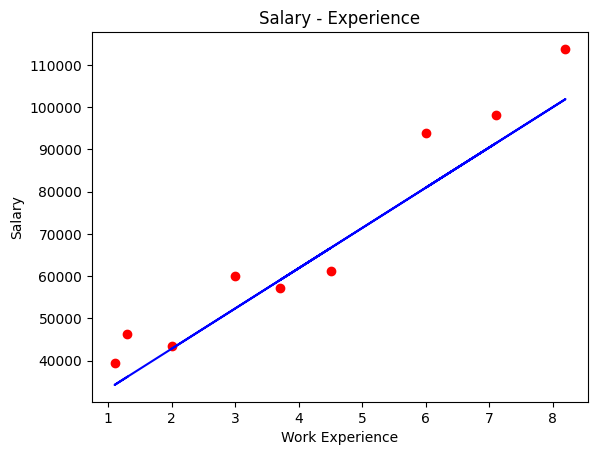

In [36]:
plt.scatter(X_test, Y_test, color = 'r')
plt.plot(X_test, test_prediction, color = 'b')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary - Experience')
plt.show()